<a href="https://colab.research.google.com/github/2-changmin/oss2025/blob/main/(%EC%8B%A4%EC%8A%B5%ED%8C%8C%EC%9D%BC)OSS2025_Mining_Hidden_Gems_on_YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube API와 함께하는 핸즈온 튜토리얼
Youtube는 No1인 비디오 공유 플랫폼이다. 1억명 사용자들은 수천억시간의 비디오를 소비하고 매분마다 500시간의 컨텐츠가 업로드된다.

다양한 형태와 장르의 영상들이 존재한다. 주로 뮤직비디오, 강좌, 버라이어티 쇼, 드라마, 상품 리뷰 등 녹화된 방송들이 게시되기도 한다. 한편, 홈쇼핑, 게이밍 대회 와 같은 영상들은 실시간으로 스트리밍 되기도 한다.

빅데이터 4V(Volume, Velocity, Variety, Veracity) 측면에서 Youtube 관련 데이터를 관심있어야하는 이유는 다음과 같다.
- Volume: 10억명의 사용자가 생성하고 관람하는 데이터는 엄청나게 많다.
- Velocity: 다양한 스트리밍 채널에서 사용자들은 수초내에 수백개의 메시지와 함께 커뮤니케이션 및 보기가 가능하다.
- Variety: 동영상 데이터 뿐만 아니라, 구조화된  데이터(통계치, 메타데이터)와 비구조화된 텍스트(채팅, 댓글)들을 다룰 수 있다.
- Veracity: Youtube 영상 자체가 특정 사실에 대해 불확실 정보를 포함할 수 있으며, 영상에 대한 정보가 잘못 표기될 수도 있다.

# 본 튜토리얼의 기본 목표
1. Youtube API를 이용하여 영상을 검색하거나 관련된 정보를 수집할 수 있다.
2. 수집된 정보로부터 그래프 기반 시각화
3. 키워드 분석


Copyright 2023 by datasciencelabs.org



# 사전조건
1. Youtube API를 활용하기 위해서는 Google API Python Client Library.로부터 API Key를 발급받아야 한다.
2. 개인 컴퓨터를 사용하는 경우, 가능한 Linux를 이용해서 설치(install)부분을 설치완료해야한다.

# 설치하기

install the google api python client

In [1]:
!pip install google-api-python-client youtube_transcript_api > /dev/null 2>&1

In [2]:
!pip install -q plotly > /dev/null 2>&1

In [3]:
!pip install python-dotenv > /dev/null 2>&1

# API documentation
구체적인 Youtube API[https://developers.google.com/youtube/v3] 다음 링크에 있는 문서를 참고하시기 바랍니다.

API Reference
https://developers.google.com/youtube/v3/docs

## Query Template

PYTHON API는 다음과 같이 api.(resources).(method) 형태로 구성된다.
```
# To perform list method on playlists resource
request = youtube.playlists().list(
)
# To perform list method on videos resource
request = youtube.videos().list(
)
# to perform list method on channels resource
request = youtube.channels().list(
)
```

Search vs. Video resources

Search resource: contains information about a Youtube video, channel or playlist that matches the search parameters specified in an API request

Video resource: representes a Youtube Video

Part parameter
https://developers.google.com/youtube/v3/docs/search/list#parameters

a comma-separated list of one or more search resource properties that the API response will include. Set the parameter value to snippet.

In [4]:
from google.colab import drive
import json

drive.mount('/content/drive')

with open('/content/drive/MyDrive/config.json') as f:
    config = json.load(f)

API_KEY = config["API_KEY"]
WIKI_API_KEY = config["WIKI_API_KEY"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# API client library
import googleapiclient.discovery
# API information
api_service_name = "youtube"
api_version = "v3"

# API client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey = API_KEY)

# 'request' variable is the only thing you must change
# depending on the resource and method you need to use
# in your query
request = youtube.search().list(
    part="id,snippet",
    type='video',
    q="Python 강의",
    videoDuration='medium',
    videoDefinition='high',
    maxResults= 10
)

# Query execution
video_list = request.execute()

In [6]:
video_list['items'][0]['snippet']['title']
video_id = video_list['items'][0]['id']['videoId']
video_title = video_list['items'][0]['snippet']['title']
video_title1 = video_list['items'][1]['snippet']['title']
video_title2 = video_list['items'][2]['snippet']['title']
video_title3 = video_list['items'][3]['snippet']['title']
video_title4 = video_list['items'][4]['snippet']['title']
video_title5 = video_list['items'][5]['snippet']['title']
video_title6 = video_list['items'][6]['snippet']['title']
video_title7 = video_list['items'][7]['snippet']['title']
video_title8 = video_list['items'][8]['snippet']['title']
video_title8


'NumPy copy and view Explained - Python Data Science Guide | For Beginners (Lecture #22)'

### Youtube 자막 받아오기

In [7]:
from youtube_transcript_api import YouTubeTranscriptApi

# Youtube 자막 추출 함수
def get_transcript(video_id, languages=['ko']):
  transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['ko'])
  full_transcript = ' '.join([item['text'] for item in transcript])
  return full_transcript


In [8]:
# Video ID 추출
video_id = video_list['items'][0]['id']['videoId']
video_id1 = video_list['items'][1]['id']['videoId']
video_id2 = video_list['items'][2]['id']['videoId']
video_id3= video_list['items'][3]['id']['videoId']
video_id4 = video_list['items'][4]['id']['videoId']
video_id5 = video_list['items'][5]['id']['videoId']
video_id6 = video_list['items'][6]['id']['videoId']
video_id7= video_list['items'][7]['id']['videoId']
video_id8 = video_list['items'][8]['id']['videoId']

# Youtube 영상의 자막 받아오기
full_transcript = get_transcript(video_id)
full_transcript1 = get_transcript(video_id1)
full_transcript2 = get_transcript(video_id2)
full_transcript3 = get_transcript(video_id3)
full_transcript4 = get_transcript(video_id4)
full_transcript5 = get_transcript(video_id5)
full_transcript6 = get_transcript(video_id6)
full_transcript7 = get_transcript(video_id7)
#full_transcript8 = get_transcript(video_id8)

Wikipedia API를 이용하여 관련 키워드 추출

In [9]:
import requests
import json

# API 정보

url = 'http://www.wikifier.org/annotate-article'

params = {
    'text': full_transcript,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response = requests.post(url, data=params)
wikis = response.json()

params1 = {
    'text': full_transcript1,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response1 = requests.post(url, data=params1)
wikis1 = response1.json()

params2 = {
    'text': full_transcript2,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response2 = requests.post(url, data=params2)
wikis2 = response2.json()

params3 = {
    'text': full_transcript3,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response3 = requests.post(url, data=params3)
wikis3 = response3.json()

params4 = {
    'text': full_transcript4,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response4 = requests.post(url, data=params4)
wikis4 = response4.json()

params5 = {
    'text': full_transcript5,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response5 = requests.post(url, data=params5)
wikis5 = response5.json()

params6 = {
    'text': full_transcript6,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response6 = requests.post(url, data=params6)
wikis6 = response6.json()

params7 = {
    'text': full_transcript7,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response7 = requests.post(url, data=params7)
wikis7 = response7.json()
'''
params8 = {
    'text': full_transcript8,
    'lang': 'ko',
    'userKey': WIKI_API_KEY,
    'pageRankSqThreshold': 0.8,
    'applyPageRankSqThreshold': 'true',
    'nTopDfValuesToIgnore': 100,
    'nWordsToIgnoreFromList': 100
}

response8 = requests.post(url, data=params8)
wikis8 = response8.json()
'''

"\nparams8 = {\n    'text': full_transcript8,\n    'lang': 'ko',\n    'userKey': WIKI_API_KEY,\n    'pageRankSqThreshold': 0.8,\n    'applyPageRankSqThreshold': 'true',\n    'nTopDfValuesToIgnore': 100,\n    'nWordsToIgnoreFromList': 100\n}\n\nresponse8 = requests.post(url, data=params8)\nwikis8 = response8.json()\n"

In [10]:
keywords = set()
for d in wikis['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords.add(candidate['title'])

keywords1 = set()
for d in wikis1['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords1.add(candidate['title'])

keywords2 = set()
for d in wikis2['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords2.add(candidate['title'])

keywords3 = set()
for d in wikis3['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords3.add(candidate['title'])

keywords4 = set()
for d in wikis4['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords4.add(candidate['title'])

keywords5 = set()
for d in wikis5['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords1.add(candidate['title'])

keywords6 = set()
for d in wikis6['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords2.add(candidate['title'])

keywords7 = set()
for d in wikis7['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords3.add(candidate['title'])
'''
keywords8 = set()
for d in wikis8['ranges']:
  for candidate in d['candidates']:
    if candidate['cosine'] > 0.05:
      keywords4.add(candidate['title'])

keywords8
'''

"\nkeywords8 = set()\nfor d in wikis8['ranges']:\n  for candidate in d['candidates']:\n    if candidate['cosine'] > 0.05:\n      keywords4.add(candidate['title'])\n\nkeywords8\n"

#### Exercise
영상 간 공통 키워드를 연결하는 네트워크 그래프를 만들기
1. N개 유튜브 강의에 대해 대표 키워드 세트 정의
2. 영상 2개씩 조합하여 공통 키워드 추출
3. 공통 키워드가 있으면 NetworkX를 이용해 연결
4. 엣지 라벨로 공통 키워드 표시, 노드는 영상 제목 표시

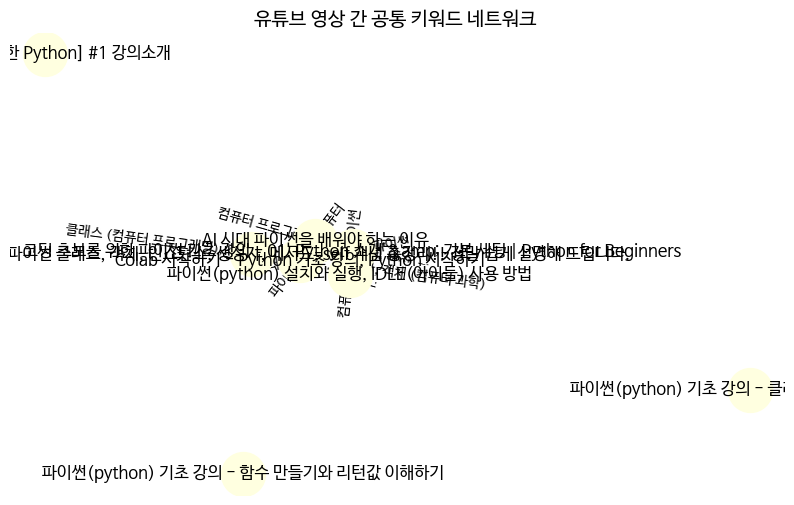

In [11]:

!sudo apt-get install -y fonts-nanum > /dev/null 2>&1
!sudo fc-cache -fv > /dev/null 2>&1
!rm ~/.cache/matplotlib -rf > /dev/null 2>&1

# 1. 한글 폰트 설치 (나눔고딕)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import networkx as nx
from itertools import combinations

# 2. Colab 런타임에 폰트 적용
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3. 영상별 키워드 예시
# 추출한 것으로 수정 필요!
video_keywords = {
  video_title: keywords,
  video_title1: keywords1,
  video_title2: keywords2,
  video_title3: keywords3,
  video_title4: keywords4,
  video_title5: keywords5,
  video_title6: keywords6,
  video_title7: keywords7,
  #video_title8: keywords8
}

# 4. NetworkX 그래프 생성
G = nx.Graph()
G.add_nodes_from(video_keywords.keys())

for vid1, vid2 in combinations(video_keywords.keys(), 2):
    shared = video_keywords[vid1] & video_keywords[vid2]
    if shared:
        G.add_edge(vid1, vid2, weight=len(shared), label=", ".join(shared))

# 5. 시각화
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightyellow")
nx.draw_networkx_labels(G, pos, font_size=12, font_family='NanumBarunGothic')
nx.draw_networkx_edges(G, pos, width=2)

# edge label 표시
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family='NanumBarunGothic')

plt.title("유튜브 영상 간 공통 키워드 네트워크 ", fontsize=14)
plt.axis("off")
plt.show()

### 🔍 **시각적 가독성 개선을 위한 작은 변화**

기존 그래프는 한눈에 보기엔 **많이 복잡하고 시선이 분산되는 느낌**이 있었습니다.  
그래서 *사용자의 직관적인 이해*를 돕기 위해 **마우스를 가져다 댔을 때 제목이 표시되도록 개선**했습니다.

*각 선들에는 공통 키워드들을 표시해두었고 넘버링이 되어있는 원에 마우스를 가져다 대면 영상의 제목이 나옵니다.*

#### 깃허브에서는 아래 코드에 대한 그래프가 나오지 않습니다. 코랩 주소를 통해 들어가셔서 확인해주시면 됩니다!

In [12]:
import plotly.graph_objects as go

pos = nx.spring_layout(G, seed=42)

# 노드 trace 만들기
node_trace = go.Scatter(
    x=[], y=[], text=[], mode='markers+text',
    hoverinfo='text', textposition='top center',
    marker=dict(size=20, color='lightblue')
)

node_hover_text = []
for i, node in enumerate(G.nodes()):
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([str(i + 1)])  # 숫자만 표시
    node_hover_text.append(f"{i+1}. {node}")
node_trace.hovertext = node_hover_text

# 엣지 trace 생성 (선만)
edge_x = []
edge_y = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    mode='lines',
    hoverinfo='none'  # hover 제거 (항상 보일 거니까)
)

# 📌 공통 키워드 텍스트를 edge 중앙에 표시
edge_annotations = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    label = edge[2].get('label', '')

    # 두 노드 사이 중앙 좌표 계산
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2

    # annotation 추가
    edge_annotations.append(
        dict(
            x=mid_x,
            y=mid_y,
            text=label,
            showarrow=False,
            font=dict(size=10),
            align='center'
        )
    )

# 최종 그래프 만들기
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='유튜브 영상 키워드 네트워크',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        annotations=edge_annotations,  # ← 📌 엣지 키워드 표시
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

fig.show()